Myers Briggs Type Indicator (MBTI) is a personality type that divides people into 16 different personality types:

Introversion (I) – Extroversion (E)
Intuition (N) – Sensing (S)
Thinking (T) – Feeling (F)
Judging (J) – Perceiving (P)

2^4 personaity types. For the data and further infromation visit the below link-
https://www.kaggle.com/datasnaek/mbti-type
https://medium.com/towards-data-science/latent-semantic-analysis-deduce-the-hidden-topic-from-the-document-f360e8c0614b

In [176]:
import pandas as pd

importing data

In [177]:
data=pd.read_csv('C:/Users/91892/Desktop/prac_data.csv') 

here i have selected only one column 'posts'

In [178]:
data

,posts
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,'I'm finding the lack of me in these posts ver...
2,'Good one _____ https://www.youtube.com/wat...
3,"'Dear INTP, I enjoyed our conversation the o..."
4,'You're fired.|||That's another silly misconce...
...,...
94,I hate not being able to afford any real help ...
95,"'In Udaipur, Rajasthan, where I lived for a fe..."
96,'Amelie - though I'm sure someone has mentione...
97,'https://www.youtube.com/watch?v=8IEQpfA528M ...


In [179]:
type(data)

pandas.core.frame.DataFrame

made it a dataframe

In [180]:
df = pd.DataFrame(data) 

In [181]:
df

,posts
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,'I'm finding the lack of me in these posts ver...
2,'Good one _____ https://www.youtube.com/wat...
3,"'Dear INTP, I enjoyed our conversation the o..."
4,'You're fired.|||That's another silly misconce...
...,...
94,I hate not being able to afford any real help ...
95,"'In Udaipur, Rajasthan, where I lived for a fe..."
96,'Amelie - though I'm sure someone has mentione...
97,'https://www.youtube.com/watch?v=8IEQpfA528M ...


In [182]:
#remove special characters from the column 'posts' then save it with a new column 'clean_data'
df['clean_data'] = df['posts'].str.replace("[^a-zA-Z#]", " ") 

C:\Users\91892\AppData\Local\Temp/ipykernel_13516/1400620928.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_data'] = df['posts'].str.replace("[^a-zA-Z#]", " ")


In [183]:
df['clean_data']

0      http   www youtube com watch v qsXHcwe krw   ...
1      I m finding the lack of me in these posts ver...
2      Good one          https   www youtube com wat...
3      Dear INTP    I enjoyed our conversation the o...
4      You re fired    That s another silly misconce...
                            ...                        
94    I hate not being able to afford any real help ...
95     In Udaipur  Rajasthan  where I lived for a fe...
96     Amelie   though I m sure someone has mentione...
97     https   www youtube com watch v  IEQpfA   M  ...
98     This   Also flashbacks to times you ve been c...
Name: clean_data, Length: 99, dtype: object

fill the NAs with empty and keep the words that have letters greater than 2 

In [184]:
df['clean_data'] = df['clean_data'].fillna('').apply(lambda x: ' '.join([w for w in x.split() if len(w)>2])) 

lowercase all words

In [185]:
df['clean_data'] = df['clean_data'].fillna('').apply(lambda x: x.lower())

to remove a, an, the (stopwords)  because the focus is on context

In [186]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91892\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


tokenization: splitting up a larger body of text into smaller lines, words or even creating words for a non-English language.

In [187]:
tokenized_doc = df['clean_data'].fillna('').apply(lambda x: x.split())

In [188]:
tokenized_doc

0     [http, www, youtube, com, watch, qsxhcwe, krw,...
1     [finding, the, lack, these, posts, very, alarm...
2     [good, one, https, www, youtube, com, watch, f...
3     [dear, intp, enjoyed, our, conversation, the, ...
4     [you, fired, that, another, silly, misconcepti...
                            ...                        
94    [hate, not, being, able, afford, any, real, he...
95    [udaipur, rajasthan, where, lived, for, few, y...
96    [amelie, though, sure, someone, has, mentioned...
97    [https, www, youtube, com, watch, ieqpfa, ball...
98    [this, also, flashbacks, times, you, been, cri...
Name: clean_data, Length: 99, dtype: object

de-tokenization

In [189]:
detokenized_doc = []
for i in range(len(df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
df['clean_data'] = detokenized_doc    

In [190]:
df

,posts,clean_data
0,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,http www youtube com watch qsxhcwe krw http me...
1,'I'm finding the lack of me in these posts ver...,finding the lack these posts very alarming sex...
2,'Good one _____ https://www.youtube.com/wat...,good one https www youtube com watch fhigbolff...
3,"'Dear INTP, I enjoyed our conversation the o...",dear intp enjoyed our conversation the other d...
4,'You're fired.|||That's another silly misconce...,you fired that another silly misconception tha...
...,...,...
94,I hate not being able to afford any real help ...,hate not being able afford any real help own t...
95,"'In Udaipur, Rajasthan, where I lived for a fe...",udaipur rajasthan where lived for few years sq...
96,'Amelie - though I'm sure someone has mentione...,amelie though sure someone has mentioned this ...
97,'https://www.youtube.com/watch?v=8IEQpfA528M ...,https www youtube com watch ieqpfa ball kind i...


In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [192]:
vectorizer = TfidfVectorizer(stop_words='english', smooth_idf=True)

In [193]:
vectorizer

TfidfVectorizer(stop_words='english')

In [194]:
X = vectorizer.fit_transform(df['clean_data'])

In [195]:
X

<99x10325 sparse matrix of type '<class 'numpy.float64'>'
	with 37677 stored elements in Compressed Sparse Row format>

In [196]:
dictionary = vectorizer.get_feature_names()

C:\Users\91892\.conda\envs\KagglePsy\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [197]:
dictionary 

['aaaand',
 'aaages',
 'aaahhmahghash',
 'aaand',
 'aabbeeoorryy',
 'aafc',
 'aang',
 'aayg',
 'aba',
 'abacrombie',
 'abandon',
 'abandoned',
 'abc',
 'abdxpvbr',
 'abilities',
 'ability',
 'abit',
 'abitsilly',
 'able',
 'ableist',
 'ablysmal',
 'aboard',
 'abortion',
 'abraham',
 'abraxas',
 'abroad',
 'abrupt',
 'abs',
 'absence',
 'absently',
 'absentminded',
 'absol',
 'absolute',
 'absolutely',
 'absolution',
 'absorbed',
 'absractly',
 'abstract',
 'abstraction',
 'abstractions',
 'absurd',
 'absurdist',
 'abuse',
 'abused',
 'abusers',
 'abusive',
 'abuwabu',
 'academia',
 'academic',
 'academical',
 'accelerated',
 'accendo',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accessible',
 'accident',
 'accidentally',
 'accidenthttp',
 'accidents',
 'accommodating',
 'accompanied',
 'accompanying',
 'accomplish',
 'accomplished',
 'accomplishment',
 'according',
 'account',
 'accountable',
 'accountant',
 'accountants',
 'accounting',


In [198]:
from sklearn.decomposition import TruncatedSVD

In [199]:
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=100, random_state=122)

In [200]:
lsa = svd_model.fit_transform(X)

In [201]:
pd.options.display.float_format = '{:,.16f}'.format
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2"])
topic_encoded_df["documents"] = df['clean_data']
display(topic_encoded_df[["documents", "topic_1", "topic_2"]])

,documents,topic_1,topic_2
0,http www youtube com watch qsxhcwe krw http me...,0.2979381192256260,0.6660390324691293
1,finding the lack these posts very alarming sex...,0.3146550214722085,0.1548963666925563
2,good one https www youtube com watch fhigbolff...,0.2856058987351497,0.1552667814159505
3,dear intp enjoyed our conversation the other d...,0.3437169395713898,-0.0232325827436641
4,you fired that another silly misconception tha...,0.3274303098162977,0.0613549661782943
...,...,...,...
94,hate not being able afford any real help own t...,0.3488347828927292,-0.0824959617825626
95,udaipur rajasthan where lived for few years sq...,0.2760467796198761,-0.0454758033325586
96,amelie though sure someone has mentioned this ...,0.3899413934598802,0.0796811712030685
97,https www youtube com watch ieqpfa ball kind i...,0.2213150436619777,0.1760848313532186


In [202]:
import matplotlib.pyplot as plt

extracting the values and saving it in an array to plot

In [203]:
data2=data1[['topic_1','topic_2']].values

addind the colomn named 'type' in the realdataset from Kaggle.com (mbti)

In [204]:
data1["label"]=pd.read_csv('C:/Users/91892/Desktop/data.csv')

In [205]:
data1[:5]

,documents,topic_1,topic_2,label
0,http www youtube com watch qsxhcwe krw http me...,0.2979381192256260,0.6660390324691293,INFJ
1,finding the lack these posts very alarming sex...,0.3146550214722085,0.1548963666925563,ENTP
2,good one https www youtube com watch fhigbolff...,0.2856058987351497,0.1552667814159505,INTP
3,dear intp enjoyed our conversation the other d...,0.3437169395713898,-0.0232325827436641,INTJ
4,you fired that another silly misconception tha...,0.3274303098162977,0.0613549661782943,ENTJ


In [206]:
data2[:5]

array([[ 0.29793812,  0.66603903],
       [ 0.31465502,  0.15489637],
       [ 0.2856059 ,  0.15526678],
       [ 0.34371694, -0.02323258],
       [ 0.32743031,  0.06135497]])

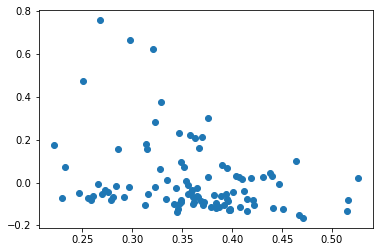

In [207]:
plt.scatter(x=data2[:,0:1],y=data2[:,1:2])

In [208]:
import seaborn as sbn

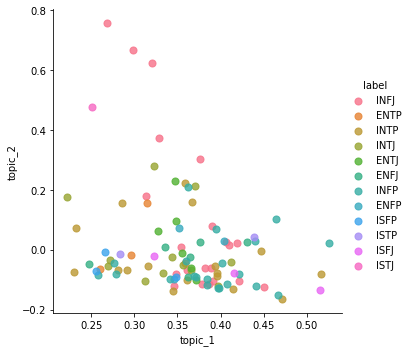

In [209]:
sbn.lmplot(x="topic_1",y="topic_2",data=data1,hue="label",fit_reg=False,scatter_kws={"s":50})